# Convolutional Layer
## import libraries

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

os.chdir(r'C:\Users\atavares\PycharmProjects\ComputerVision')

## Import the image

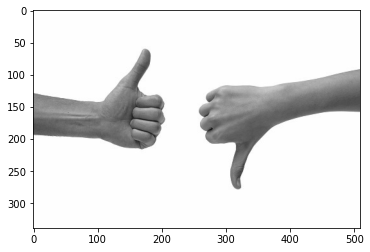

In [17]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Feel free to try out your own images here by changing img_path
# to a file path to another image on your computer!
img_path = 'data/images/thumbs_up_down.jpg'

# load color image
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

## Define and visualize the filters

In [18]:
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# For an example, print out the values of filter 1
print('Filter 1: \n', filter_1)

Filter shape:  (4, 4)
Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define a neural network with a convolutional layer with
# four filters and layer of size (4, 4)
# here we declare that the Net class
# inherits from nn.module class
class Net(nn.Module):

    def __init__(self, weight):
        super(Net, self).__init__()

        batch_size = 1 # (N,Cin,H,W) where N is the batch size
        in_channels = 4 # Cin or in_channels denotes a number of channels
        # H and W is a height of input planes in pixels and W is width in pixels
        k_weight, k_width = weight.shape[2:]
        kernel_size=(k_weight, k_width)

        # assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(batch_size, in_channels, kernel_size, bias=False)
        self.conv.weight = torch.nn.Parameter(weight)

        # define a pooling layer
        self.pool = nn.MaxPool2d(4, 4)

    def forward(self, x):
        # Calculates the output of a convolutional layer
        # pre and por activation
        conv_x = self.conv(x)
        activated_x = self.pool(conv_x)

        # applies pooling layer
        pooled_x = self.pool(activated_x)

        # returns all layers
        return conv_x, activated_x, pooled_x

# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
)


### Visualize the output of each filter

In [20]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))

    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

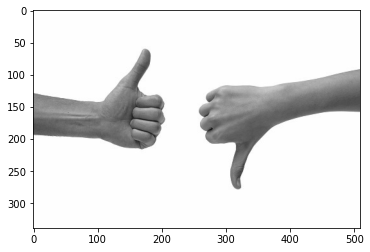

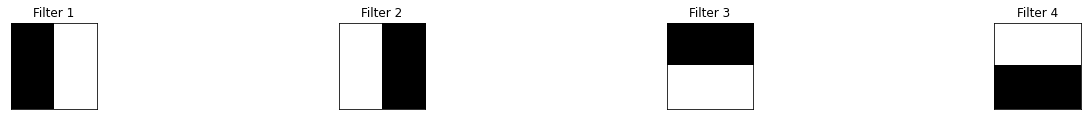

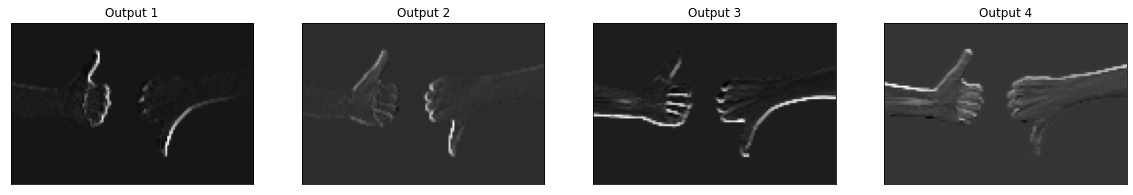

In [21]:
# plot original image
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))


# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get all the layers
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

# visualize the output of the activated conv layer
viz_layer(activated_layer)

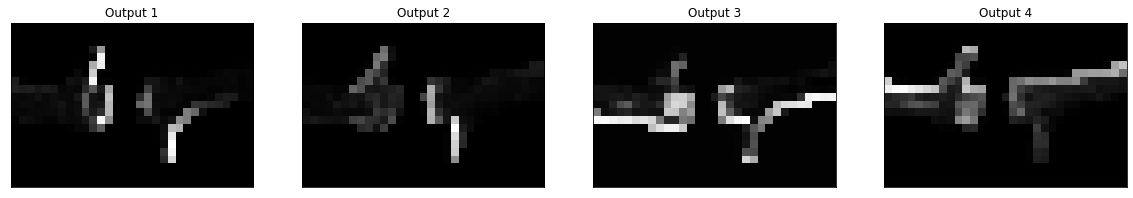

In [22]:
# visualize the output of the pooling layer
viz_layer(pooled_layer)

In [27]:
print(pooled_layer.shape)
print(activated_layer.shape)

torch.Size([1, 4, 21, 31])
torch.Size([1, 4, 84, 126])
